Pymaceuticals Inc.


Analysis

According to the Summary Statistics Table, the two drug regimens that show the best values for tumor volume (lower values with less variance) are Capomulin and Ramicane, both more than 10 mm3 below the placebo in mean and median where the others were no more than 2 mm3. 

To further support the superiority of Capomulin and Ramicane, the bar graph showing total time points per drug regimen indicates that both Capomulin and Ramicane had almost fifty more timepoints than the other drugs. This is relevant because more timepoints implies that more mice with those drugs survived long enough to be checked more times throughout the entire 45-day period. It should be noted that, due to a duplicated ID error, one or two mice from the Propriva drug regimen were removed explaining the smaller timepoint amounts. However, there statistics show little variation from the other drugs that should little improvement. 

Furthermore, in comparing the quartiles of the four leading drug regimens, Capomulin and Ramicane again show their superior effectiveness compared to Infubinol and Ceftamin. The minimum bounds for Infubinol and Ceftamin are at or below the upper bound of Ramicane or overlapping just slightly with Capomulin. The model shows that at least 75% of the mice on Capomulin and Ramicane had lower tumor volumes at the end then all the mice on the other drugs. It is also possible that, besides the outlier for Infubinol and the minimum(s) for Ceftamin, all the Ramicane mice had smaller tumor values than all the mice of the other two drugs. It also shows that Capomulin does not outperform Ramicane but does show similarities in results. 

There is also a moderately strong correlation between Tumor Volume and the weight of the mouse.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_study = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
complete_study.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [2]:
# Checking the number of mice.
mice_count = complete_study['Mouse ID'].unique().size
mice_count

249

In [3]:
complete_study['Mouse ID'].size

1893

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mask1 = complete_study.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicated_ID = complete_study[mask1]
duplicated_ID['Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
for i in duplicated_ID['Mouse ID'].unique():

    mask2 = complete_study["Mouse ID"] == i
    
    print(complete_study[mask2])

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294        

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for i in duplicated_ID['Mouse ID'].unique():
    mask3 = complete_study["Mouse ID"] != i
    
clean_complete_study = complete_study[mask3]

clean_complete_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_complete_study['Mouse ID'].unique().size
clean_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor = clean_complete_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = clean_complete_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = clean_complete_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation_tumor = clean_complete_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
error_tumor = clean_complete_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_data = pd.DataFrame(
    {
        "Mean Tumor Volume" : mean_tumor,
        "Median Tumor Volume" : median_tumor,
        "Tumor Volume Variance" : variance_tumor,
        "Tumor Volume Std. Dev." : standard_deviation_tumor,
        "Tumor Volume Std. Err." : error_tumor
    }
)

regimen_data.reset_index()

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
mask3 = clean_complete_study.groupby('Drug Regimen')["Tumor Volume (mm3)"]

# Using the aggregation method, produce the same summary statistics in a single line
agg_regimen_data = mask3.agg(['mean','median','var','std','sem'])
agg_regimen_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Drug Regimen by Number of Mice Timepoints'}>

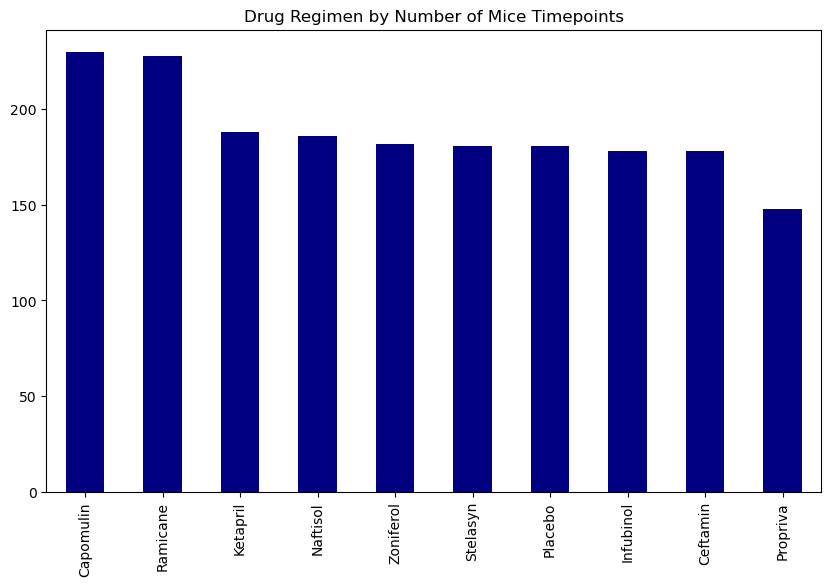

In [62]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = clean_complete_study["Drug Regimen"].value_counts()
plt.figure(figsize=(10,6))
drug_count.plot.bar(title="Drug Regimen by Number of Mice Timepoints", color="navy")

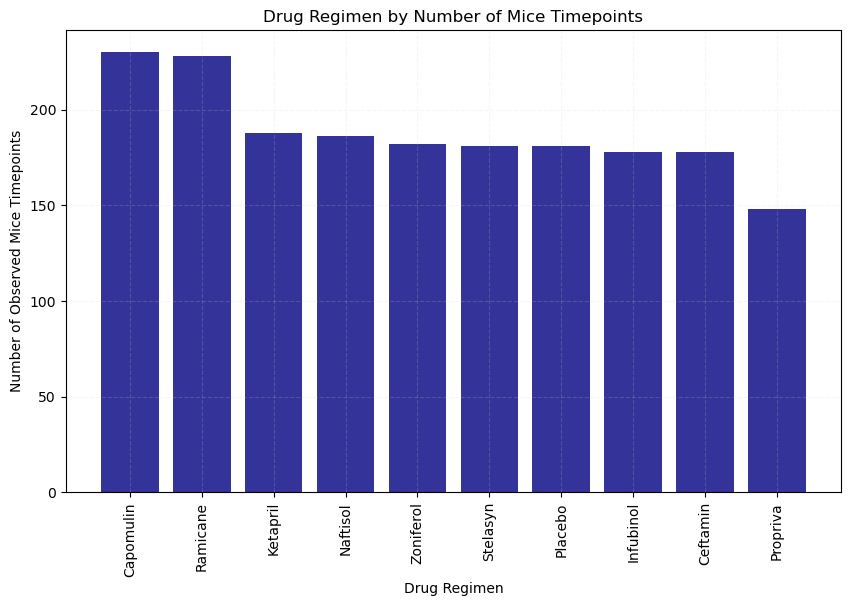

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(10,6))
plt.bar(drug_count.index, drug_count, color='Navy', alpha=0.8, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mice Timepoints")
plt.title("Drug Regimen by Number of Mice Timepoints")

plt.xticks(rotation="vertical")
plt.grid(axis="both", c="lightgray", linestyle="dashed", alpha=0.2)

plt.show()

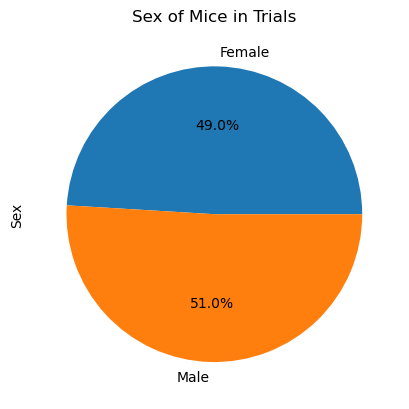

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

clean_complete_study.groupby("Sex").size().plot.pie(title="Sex of Mice in Trials", autopct="%1.1f%%", ylabel="Sex")
plt.show()

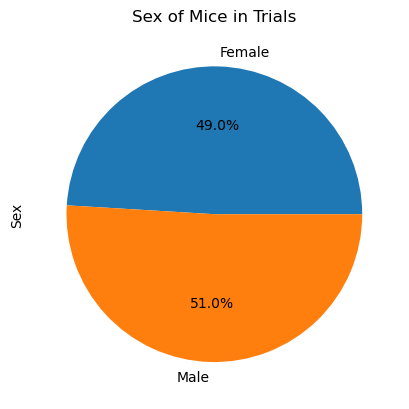

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(clean_complete_study.groupby("Sex").size(), labels=["Female", "Male"], autopct="%1.1f%%")
plt.title("Sex of Mice in Trials")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_complete_study.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_time = pd.merge(max_time, clean_complete_study, on=["Mouse ID", "Timepoint"], how="inner")

# Capomulin, Ramicane, Infubinol, and Ceftamin
last_by_drug = last_time.loc[last_time["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].reset_index(drop=True)

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = last_by_drug.loc[last_by_drug["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    if outliers.empty:
        print(f"{drug} has an IQR of {round(iqr,2)} with no potential outliers.")
    else: 
        print(f"{drug} has an IQR of {round(iqr,2)} with potential outliers. Outliers: {outliers}")

Capomulin has an IQR of 7.78 with no potential outliers.
Ramicane has an IQR of 9.1 with no potential outliers.
Infubinol has an IQR of 11.48 with potential outliers. Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin has an IQR of 15.58 with no potential outliers.


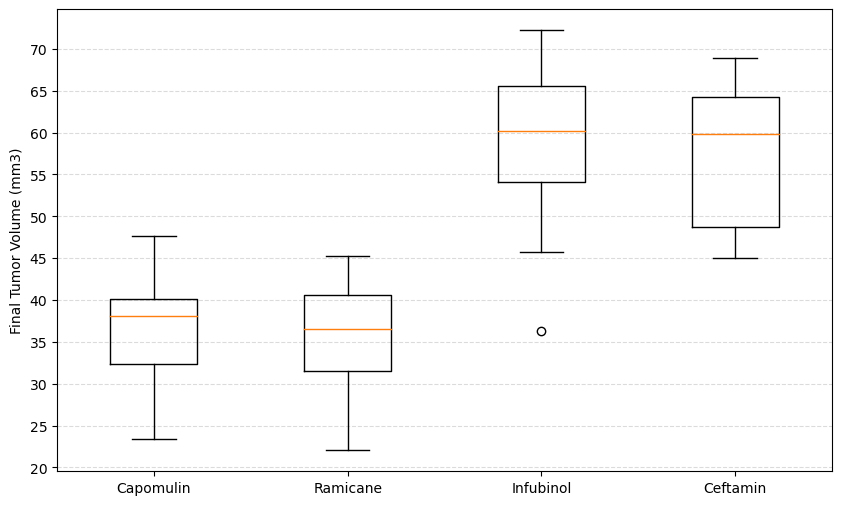

In [67]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol_list, labels = treatment_list)
plt.ylabel('Final Tumor Volume (mm3)')

plt.yticks(np.arange(20,75,5))
plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.8)
plt.show()

## Line and Scatter Plots

In [22]:
#Identify a single mouse from the Capomulin drug regimen.
capo_mice = clean_complete_study.loc[clean_complete_study["Drug Regimen"] == "Capomulin"]
rand = np.random.randint(0, len(capo_mice["Mouse ID"]))

rand_capo = capo_mice["Mouse ID"].values[rand]

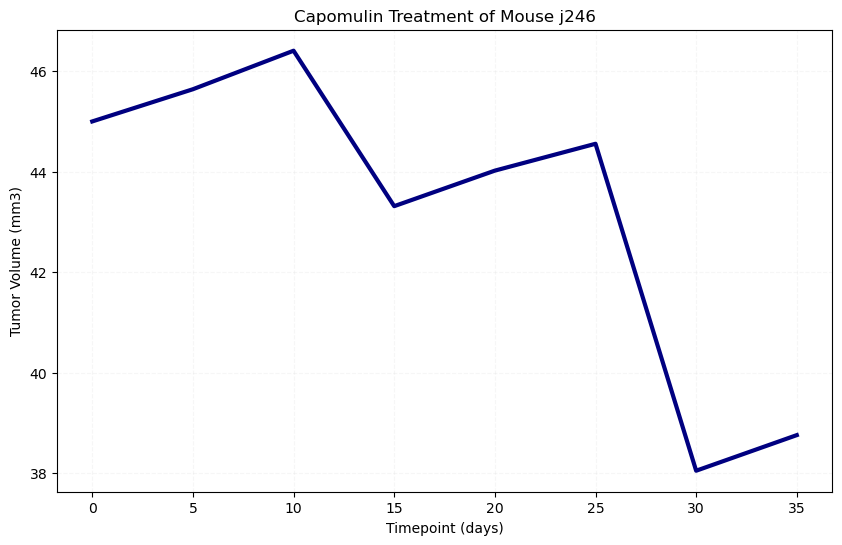

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_sub = clean_complete_study.loc[clean_complete_study["Mouse ID"] == rand_capo] 

plt.figure(figsize=(10,6))
plt.plot(df_sub.Timepoint, df_sub["Tumor Volume (mm3)"], color="Navy", linewidth=3)
plt.title(f"Capomulin Treatment of Mouse {rand_capo}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis="both", color="lightgrey", alpha=0.2, linestyle="--")
plt.show()

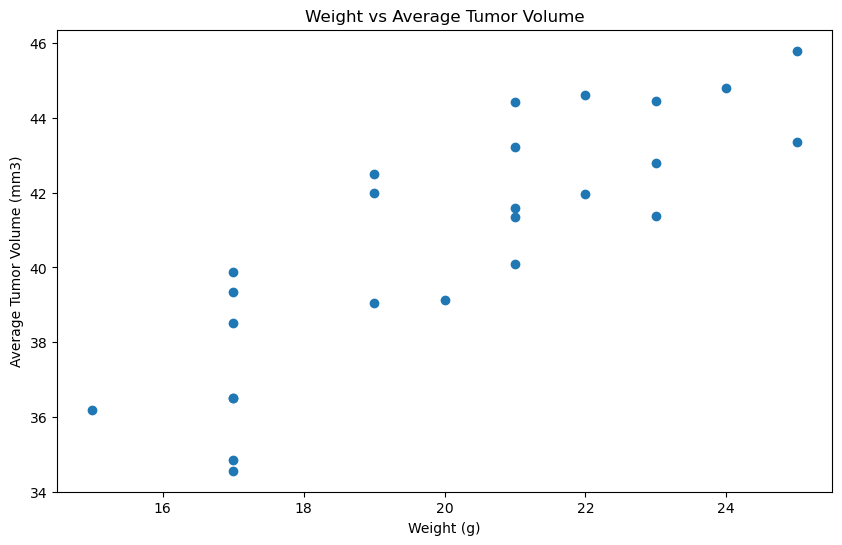

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
stat_data = pd.DataFrame(
    {
    "Weight (g)" : capo_mice.groupby("Mouse ID")["Weight (g)"].mean(),
    "Tumor Volume (mm3)" : capo_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
    }
)
plt.figure(figsize=(10,6))
plt.scatter(stat_data["Weight (g)"], stat_data["Tumor Volume (mm3)"])
plt.title("Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = round(st.pearsonr(stat_data["Weight (g)"], stat_data["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}.")

The correlation between mouse weight and the average tumor volume is 0.84.


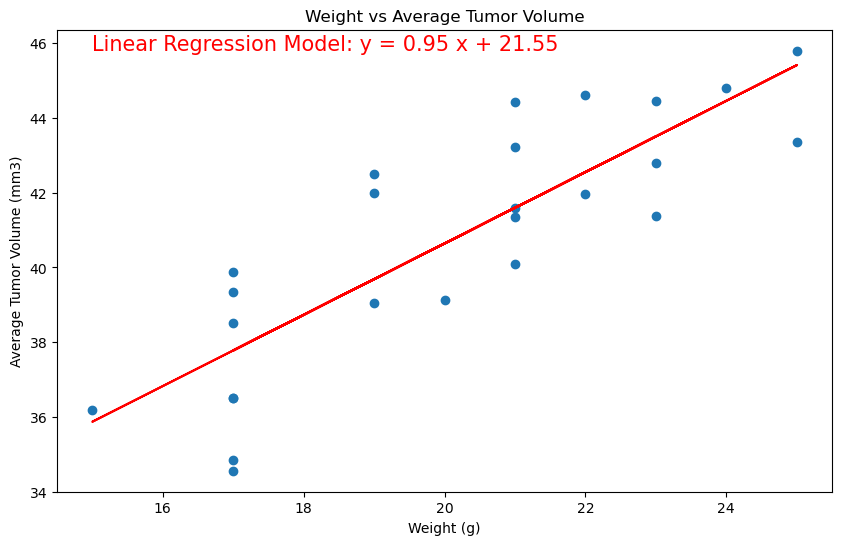

In [26]:
#linear regression model
x_values = stat_data["Weight (g)"]
y_values = stat_data["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")

plt.title("Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()